# Modules

Esta tabla contiene la información a nivel de fichero (módulo).  --> ABEL COMPLETAR <--

## 1 - Obtencion de datos

In [64]:
import matplotlib.pyplot as plt
from notebooks_utils import *

full_table = get_data('modules')

# Table name, features and target.
TABLE_NAME = 'modules'
TABLE_FEATURES = ['module__name_convention', 'module__has_doc_string', 'module__global_stmts_pct', 'module__global_expressions', 'module__number_of_classes', 'module__number_of_functions', 'module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct', 'module__average_stmts_function_body', 'module__average_stmts_method_body', 'module__type_annotations_pct', 'module__has_entry_point', 'module__expertise_level']
TABLE_TARGET = 'module__expertise_level'

# Load features and target.
X, y = full_table[TABLE_FEATURES], full_table[[TABLE_TARGET]].iloc[:,0]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. Each of the instances corresponds to a program. For each program we have {X.shape[1]} attributes.')

2024-05-10 10:36:39.126389 Data cache files found ...
2024-05-10 10:36:39.130388 Data cache files successfully loaded!!
Features shape: (18226, 14)
Target shape: (18226,)
As we can see the downloaded data contains a total of 18226 instances. Each of the instances corresponds to a program. For each program we have 14 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [65]:
print(X.info())
print('=============')
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18226 entries, 0 to 18225
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   module__name_convention              18226 non-null  object 
 1   module__has_doc_string               18226 non-null  bool   
 2   module__global_stmts_pct             18226 non-null  float64
 3   module__global_expressions           18226 non-null  float64
 4   module__number_of_classes            18226 non-null  int64  
 5   module__number_of_functions          18226 non-null  int64  
 6   module__class_defs_pct               18226 non-null  float64
 7   module__function_defs_pct            18226 non-null  float64
 8   module__enum_defs_pct                18226 non-null  float64
 9   module__average_stmts_function_body  18226 non-null  float64
 10  module__average_stmts_method_body    18226 non-null  float64
 11  module__type_annotations_pct

Cómo podemos ver la tabla está compuesta por diez variables numéricas, dos variables boleanas y dos de tipo objeto. Las dos últimas variables son la etiqueta de la instancia y el name convention. Sin embargo, en algunas ocasiones estas últimas clases no las vamos a utilizar. Por ejemplo, si queremos obtener clusters por medio de aprendizaje no supervisado.

### 2.1 - Balance de clases

In [66]:
instances_for_class_low = len(full_table[full_table[TABLE_TARGET] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TABLE_TARGET] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low/len(full_table)*100:.4}% instances for BEGINNER class and {instances_for_class_high/len(full_table)*100:.4}% for EXPERT class.")

The dataset contains 39.09% instances for BEGINNER class and 60.91% for EXPERT class.


### 2.2 - Duplicados
Miramos si la tabla tiene entradas duplicadas.

In [67]:
number_of_duplicated_entries = sum(full_table.duplicated(subset=TABLE_FEATURES + [TABLE_TARGET]))
duplicated_entries_pct = number_of_duplicated_entries / len(full_table) * 100
print(f"The dataset contains [{duplicated_entries_pct:.4}%] of duplicated entries.")

The dataset contains [42.72%] of duplicated entries.


### 2.3 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [68]:
X.isnull().sum()

module__name_convention                0
module__has_doc_string                 0
module__global_stmts_pct               0
module__global_expressions             0
module__number_of_classes              0
module__number_of_functions            0
module__class_defs_pct                 0
module__function_defs_pct              0
module__enum_defs_pct                  0
module__average_stmts_function_body    0
module__average_stmts_method_body      0
module__type_annotations_pct           0
module__has_entry_point                0
module__expertise_level                0
dtype: int64

In [69]:
print_empty_cols(X)

module__name_convention
-----------------------
0 instancias no tienen un valor para la columna module__name_convention


module__has_doc_string
----------------------
0 instancias no tienen un valor para la columna module__has_doc_string


module__global_stmts_pct
------------------------
0 instancias no tienen un valor para la columna module__global_stmts_pct


module__global_expressions
--------------------------
0 instancias no tienen un valor para la columna module__global_expressions


module__number_of_classes
-------------------------
0 instancias no tienen un valor para la columna module__number_of_classes


module__number_of_functions
---------------------------
0 instancias no tienen un valor para la columna module__number_of_functions


module__class_defs_pct
----------------------
0 instancias no tienen un valor para la columna module__class_defs_pct


module__function_defs_pct
-------------------------
0 instancias no tienen un valor para la columna module__function_defs_

### 2.4 - Describimos los valores de las variables de la tabla.

In [70]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
module__name_convention,18226,6,SnakeCase,8629,NaN,NaN,NaN,NaN,NaN,NaN,NaN
module__has_doc_string,18226,2,False,13695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
module__global_stmts_pct,18226.0,NaN,NaN,NaN,0.227542,0.271846,0.0,0.0,0.125,0.333333,1.0
module__global_expressions,18226.0,NaN,NaN,NaN,0.094516,0.171585,0.0,0.0,0.0,0.125,1.0
module__number_of_classes,18226.0,NaN,NaN,NaN,1.047899,3.35827,0.0,0.0,0.0,1.0,113.0
module__number_of_functions,18226.0,NaN,NaN,NaN,2.523044,6.308384,0.0,0.0,1.0,3.0,258.0
module__class_defs_pct,18226.0,NaN,NaN,NaN,0.31924,0.429019,0.0,0.0,0.0,0.888889,1.0
module__function_defs_pct,18226.0,NaN,NaN,NaN,0.458978,0.464533,0.0,0.0,0.333333,1.0,1.0
module__enum_defs_pct,18226.0,NaN,NaN,NaN,0.003743,0.045174,0.0,0.0,0.0,0.0,1.0
module__average_stmts_function_body,18226.0,NaN,NaN,NaN,2.732112,3.928782,0.0,0.0,1.25,4.4,53.0


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesaario ver la distribucion de lo valores para hacer los bins (categorias).

In [72]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "module__class_defs_pct": [(0.0, 0.0),(0.0, 1.0), (1.0, 1.0)],  # min: 0.0 max: 1.0
    "module__function_defs_pct": [(0.0, 0.0),(0.0, 1.0), (1.0, 1.0)],  # min: 0.0 max: 1.0
    "module__enum_defs_pct": [(0.0, 0.0), (0.0, inf)],  # min: 0.0 max: 1.0
    "module__number_of_classes": [(0, 0), (1, 1), (2,2), (3,3), (4,inf)],  # min: 0 max: 113
    "module__number_of_functions": [(0, 0), (0, inf)], # min: 0 max: 258
    "module__type_annotations_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 max: 1.0
    "module__average_stmts_function_body": [(0.0, 0.0), (0.0, 3.0), (3.0, inf)], #min: 0.0 max: 53.0
    "module__average_stmts_method_body": [(0.0, 0.0), (0.0, 3.0), (3.0, inf)], # min: 0.0 max: 114.0
    "module__global_expressions": [(0,0), (0.0, inf)], # min: 0.0 max: 1.0
    "module__global_stmts_pct": [(0, 0), (0.0, inf)] # min: 0.0 max: 1.0
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['module__class_defs_pct'], 10))
print(get_statistics(X_copy, ['module__function_defs_pct'], 10))
print(get_statistics(X_copy, ['module__enum_defs_pct'], 10))
print(get_statistics(X_copy, ['module__number_of_classes'], 10))
print(get_statistics(X_copy, ['module__number_of_functions'], 10))
print(get_statistics(X_copy, ['module__type_annotations_pct'], 10))
print(get_statistics(X_copy, ['module__average_stmts_function_body'], 10))
print(get_statistics(X_copy, ['module__average_stmts_method_body'], 10))
print(get_statistics(X_copy, ['module__global_expressions'], 10))
print(get_statistics(X_copy, ['module__global_stmts_pct'], 10))
print(get_statistics(X_copy, ['module__has_doc_string'], 10))
print(get_statistics(X_copy, ['module__has_entry_point'], 10))
print(get_statistics(X_copy, ['module__name_convention'], 10))


# 2 FEATURES
print("--- TWO FEATURES ---")
print(get_statistics(X_copy, ['module__function_defs_pct', 'module__number_of_classes'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
module__class_defs_pct  count  percentage
             [0.0_0.0]  10582   58.059914
             [1.0_1.0]   4530   24.854603
             [0.0_1.0)   3114   17.085482

module__function_defs_pct  count  percentage
                [0.0_0.0]   8602   47.196313
                [1.0_1.0]   6570   36.047405
                [0.0_1.0)   3054   16.756282

module__enum_defs_pct  count  percentage
            [0.0_0.0]  18037    98.96302
            [0.0_inf]    189     1.03698

module__number_of_classes  count  percentage
                    [0_0]  10582   58.059914
                    [1_1]   4684   25.699550
                    [2_2]   1278    7.011961
                  [4_inf]   1192    6.540108
                    [3_3]    490    2.688467

module__number_of_functions  count  percentage
                    [0_inf]   9624   52.803687
                      [0_0]   8602   47.196313

module__type_annotations_pct  count  percentage
                   [0.0_0.0]  12754   69.9

In [73]:
def normalize_datatypes(X:pd.DataFrame, y:pd.Series) -> (pd.DataFrame, pd.Series, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')
    y = y.apply(lambda value: 0 if value == "BEGINNER" else 1) # EXPERT will be 1 and BEGINNER will be 0.
    y = y.astype('float32')
    columns_names = X.columns.tolist()
    return X, y, columns_names

X, y, TABLE_FEATURES = normalize_datatypes(X, y)
# Print information about the loaded table
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

Features shape: (18226, 20)
Target shape: (18226,)


#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

<Axes: >

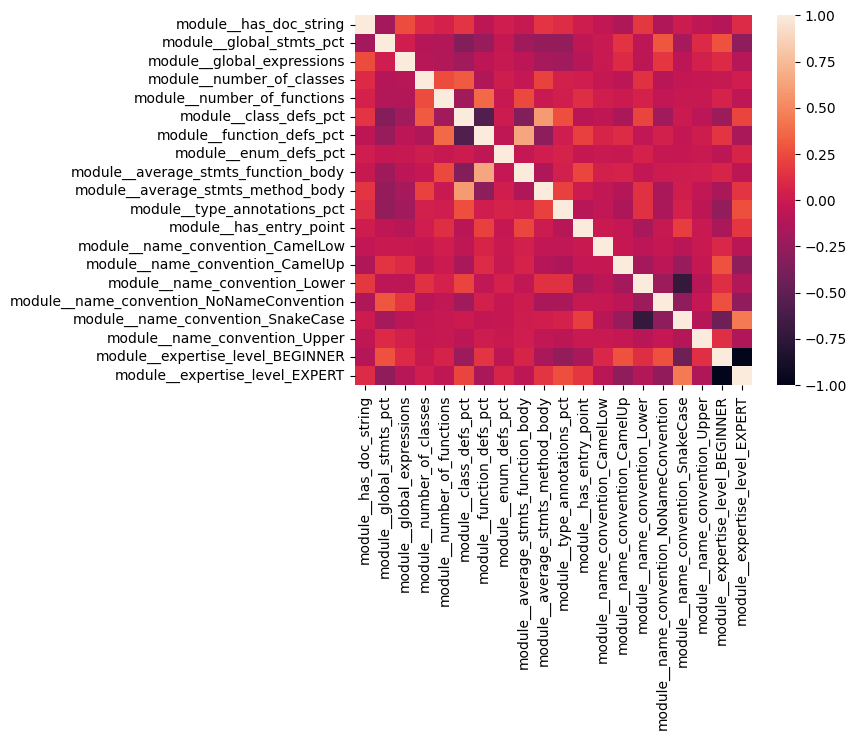

In [74]:
sns.heatmap(X.corr(), annot=False)

## 3 - Detección de valores atípicos (outliers)
Una vez sabemos qué datos contiene la tabla, analizaremos los valores que toma cada una de las variables de cada instancia. El objetivo es identificar posibles valores atípicos que nos dificulten la realización de futuras tareas. 
Tras su análisis, se puede concluir que un valor:
    - **Es erróneo**. En este caso hay que tomar una decisión para cada caso, siendo los tratamientos más extendidos son listwise, pairwise, drop variables, mean/median imputation, most frequent, separate category, zero imputation, cold deck, hot deck,(stochastic) regression, k-NN and multiple imputation. Los resultados de imputación regresiva, k-NN y múltiple dan buenos resultados, aunque, como se ha indicado, es necesario el estudio en cada caso.
    - **Es correcto, pero anómalo**. Se documenta su existencia para su posible discusión y se mantiene en el dataset. En estos casos se hace necesaria la utilización de algoritmos y estadísticos que no sean muy sensibles a dichos valores anómalos.

## Univariate
Para cada uno de los atributos se debe realizar un análisis y detección de valores atípicos, estudiando su posible causa. 
Existen diversas formas de calcular los valores anómalos. 

### Variables numéricas
Para las variables numéricas, se suele identificar: 
    - a) Valor atípico leve es el que está fuera de $[Q1 - 1.5IQR, Q3 + 1.5IQR]$, donde $IQR = Q3-Q1$.
    - b) Valor atípico extremo está fuera de $[Q1 - 3IQR, Q3 + 3IQR]$.

La idea es probar con a) y si hay pocas instancias analizarlas. Si hubiese muchas, mirar b) y analizar si fuesen pocas. No hay un algoritmo o método estipulado, puesto que depende del dominio del problema y de los datos.

Los límites de Tukey se basan en los cuartiles de los datos y son sensibles a la presencia de sesgo en la distribución. Cuando hay asimetría en los datos, los límites de Tukey pueden no ser tan efectivos para identificar outliers de manera equitativa en ambos extremos de la distribución. El Coeficiente de Medcouple es útil para identificar la asimetría en los datos, especialmente en presencia de valores atípicos o sesgados. Es una medida robusta porque no se ve tan afectada por valores extremos como la media y la desviación estándar. El MC puede proporcionar información adicional sobre la asimetría de la distribución, lo que te permite ajustar los límites de Tukey de manera más apropiada para tu conjunto de datos específico. Una posible variacion de los límites de Tukey teniendo en cuenta MC podria ser: 
   - Si MC es mayor que 0 (asimetría hacia la derecha):
      - low = (q1-1.5 * math.exp(-4*mc) * iqr)
      - high = (q3+1.5 * math.exp(3.5*mc) * iqr)
   - Si la asimetriza es hacia la izquierda:    
      - low = (q1-1.5 * math.exp(-3.5*mc) * iqr)
      - high = (q3+1.5 * math.exp(4*mc) * iqr)


### Variables categóricas
Para las variables categóricas no existe el concepto de valor anómalo, pero sí se puede considerar en base a un análisis de frecuencia. Por ejemplo, que el uso de una categoría sea residual, pudiendo tener un 0.1% de instancias en el dataset. Para detectar estos valores, se puede fijar un valor mínimo de frecuencia en función del número posible de valores de la variable categórica (2 en el caso de una variable booleana). Por ejemplo, un umbral de $\frac{0.2\%}{valores}$ (0.1% en el caso de una variable booleana)

## Analisis detallado de variables
Para cada una de las 10 variable (3 booleanas, 4 porcentuales y 3 numericas) se hara un analisis detallado 

### Variable has_doc_string (1/14)
Esta variable es de tipo booleano y representa si el fichero contiene un comentario como primer nodo. El primer paso es hacer un análisis visual de como se distribuyen los valores de la variable.

<Axes: xlabel='module__has_doc_string', ylabel='Count'>

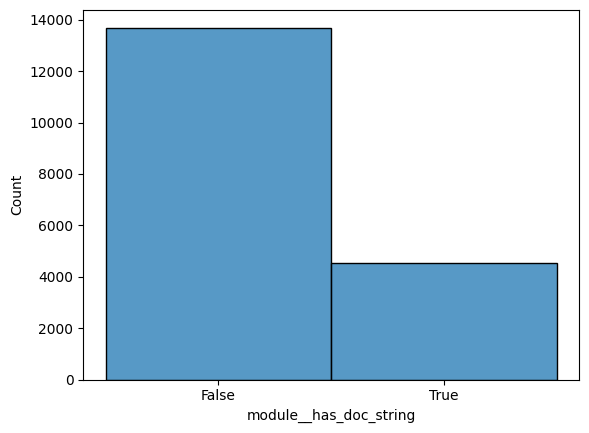

In [75]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['module__has_doc_string'], discrete=True)

In [76]:
num_true_values = len(X[X['module__has_doc_string'] == True])
num_false_values = len(X[X['module__has_doc_string'] == False])
std = X['module__has_doc_string'].std()
freq_true = len(X[X['module__has_doc_string'] == True]) / len(X['module__has_doc_string'])
freq_false = len(X[X['module__has_doc_string'] == False]) / len(X['module__has_doc_string'])
print(f'La variable has_doc_string contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a False es {freq_false}.')

La variable has_doc_string contiene 4531 valores verdaderos y 13695 valores falsos. Y, la desviación típica es de 0.43221375346183777
La frecuencia con la que programa puede tener la variable has_doc_string a True es 0.24860089981345332.
La frecuencia con la que programa puede tener la variable has_doc_string a False es 0.7513991001865467.


In [77]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'module__has_doc_string', possible_values)

La variable module__has_doc_string contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable module__has_doc_string toma el valor de 0.0 en un 75.14% de los items.
La variable module__has_doc_string toma el valor de 1.0 en un 24.86% de los items.


In [78]:
X[X['module__has_doc_string'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])


,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_EXPERT
count,4531.0,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000
mean,1.0,0.141747,0.170608,1.604061,3.044582,0.435450,0.406631,0.005414,2.610403,2.432765,0.193270,0.138821,0.001104,0.006400,0.503200,0.013684,0.474730,0.000883,0.303465,0.696535
std,0.0,0.176827,0.209757,4.393696,7.722262,0.440211,0.436080,0.054634,3.684996,2.836629,0.274837,0.345798,0.033204,0.079755,0.500045,0.116186,0.499416,0.029702,0.459805,0.459805
min,1.0,0.000000,0.002703,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.090909,0.100000,1.000000,1.000000,0.294118,0.222222,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.0,0.200000,0.200000,1.000000,3.000000,1.000000,1.000000,0.000000,4.333333,4.092752,0.469697,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.0,0.987805,1.000000,113.000000,172.000000,1.000000,1.000000,1.000000,42.000000,24.799999,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable has_entry_point (2/14)
Esta variable es de tipo booleano y representa si el fichero contiene el idiom "if __name__ == '__main__'". El primer paso es hacer un análisis visual de como se distribuyen los valores de la variable.

<Axes: xlabel='module__has_entry_point', ylabel='Count'>

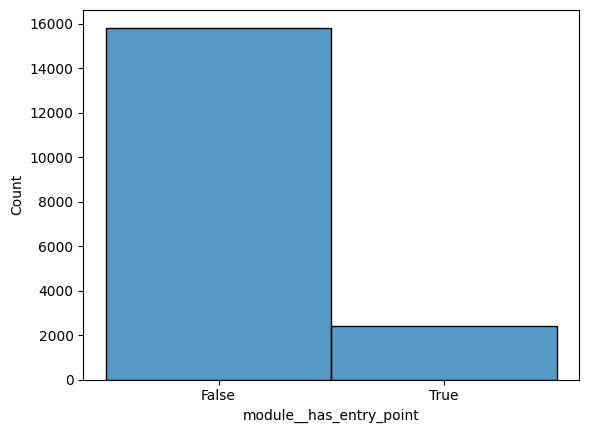

In [79]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['module__has_entry_point'], discrete=True)

In [80]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['module__has_entry_point'] == True])
num_false_values = len(X[X['module__has_entry_point'] == False])
std = X['module__has_entry_point'].std()
freq_true = len(X[X['module__has_entry_point'] == True]) / len(X['module__has_entry_point'])
freq_false = len(X[X['module__has_entry_point'] == False]) / len(X['module__has_entry_point'])
print(f'La variable has_entry_point contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_entry_point a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_entry_point a False es {freq_false}.')

La variable has_entry_point contiene 2395 valores verdaderos y 15831 valores falsos. Y, la desviación típica es de 0.3378527760505676
La frecuencia con la que programa puede tener la variable has_entry_point a True es 0.13140568418742457.
La frecuencia con la que programa puede tener la variable has_entry_point a False es 0.8685943158125754.


In [81]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'module__has_entry_point', possible_values)

La variable module__has_entry_point contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable module__has_entry_point toma el valor de 0.0 en un 86.86% de los items.
La variable module__has_entry_point toma el valor de 1.0 en un 13.14% de los items.


In [82]:
#VALORES DE LOS DATOS CONDICIONADOS A TRUE/FALSE
X[X['module__has_entry_point'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_EXPERT
count,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.0,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000
mean,0.262630,0.187452,0.049996,1.197495,4.492693,0.230002,0.706170,0.000780,5.066611,1.702623,0.079709,1.0,0.006681,0.037996,0.160334,0.066806,0.718163,0.010021,0.192484,0.807516
std,0.440155,0.148189,0.098127,5.187044,6.920440,0.374196,0.412321,0.016772,5.371254,4.028246,0.194814,0.0,0.081478,0.191226,0.366992,0.249738,0.449988,0.099622,0.394334,0.394334
min,0.000000,0.008547,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.083333,0.000000,0.000000,1.000000,0.000000,0.380042,0.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.142857,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,4.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.250000,0.066667,1.000000,5.000000,0.333333,1.000000,0.000000,7.000000,2.584627,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,0.886792,64.000000,69.000000,1.000000,1.000000,0.500000,53.000000,114.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable number_of_classes (3/14)
Esta variable es de tipo numérica y nos indica el número de clases definidos en el fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 113. Con una media de 1,047899.

<Axes: ylabel='module__number_of_classes'>

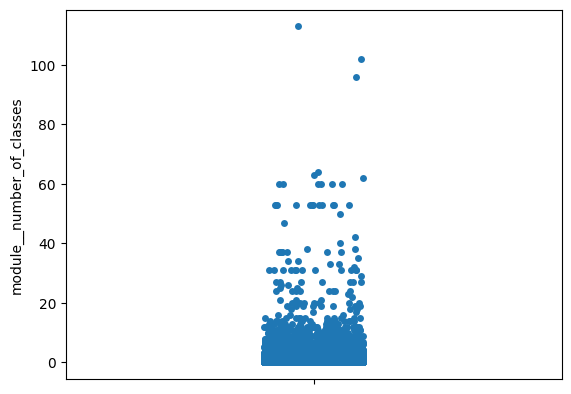

In [83]:
sns.stripplot(X['module__number_of_classes'])

In [84]:
print_outliers_for_df_column(X, 'module__number_of_classes')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9807830397245415
Rango valores atípicos extremos (Tukey): [-3.0,4.0]
Rango valores atípicos leves (Tukey): [-1.5,2.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.048447452067818045,76.83783169407444]
-3.0IQR: 0 instancias tienen un valor para module__number_of_classes inferior a -3.0 (Q1-3*IQR) para module__number_of_classes. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__number_of_classes inferior a -1.5 (Q1-1.5*IQR) para module__number_of_classes. Representando un 0.0% del total de instancias.
+1.5IQR: 1682 instancias tienen un valor para module__number_of_classes superior a 2.5 (Q3+1.5*IQR) para module__number_of_classes. Representando un 9.229% del total de instancias.
+3.0IQR: 839 instancias tienen un valor para module__number_of_classes superior a 4.0 (Q3-3*IQR) para module__number_of_classes. Representando un 4.603% del total de instancias.
L: 0 instancias tien

In [85]:
X[X['module__number_of_classes'] > 76.8].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_EXPERT
count,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,3.000000,3.000000,3.000000,3.0,3.0,3.0,3.000000,3.0,3.000000,3.0,3.0,3.0
mean,1.0,0.020280,0.144219,103.666664,3.000000,0.971435,0.028565,0.0,3.041667,2.380625,0.129630,0.0,0.0,0.0,0.666667,0.0,0.333333,0.0,0.0,1.0
std,0.0,0.018173,0.235638,8.621678,4.358899,0.042108,0.042108,0.0,4.430599,0.982732,0.224525,0.0,0.0,0.0,0.577350,0.0,0.577350,0.0,0.0,0.0
min,1.0,0.000000,0.007576,96.000000,0.000000,0.923077,0.000000,0.0,0.000000,1.793388,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.0
25%,1.0,0.012876,0.008174,99.000000,0.500000,0.957152,0.004386,0.0,0.500000,1.813361,0.000000,0.0,0.0,0.0,0.500000,0.0,0.000000,0.0,0.0,1.0
50%,1.0,0.025751,0.008772,102.000000,1.000000,0.991228,0.008772,0.0,1.000000,1.833333,0.000000,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,1.0
75%,1.0,0.030419,0.212540,107.500000,4.500000,0.995614,0.042848,0.0,4.562500,2.674242,0.194444,0.0,0.0,0.0,1.000000,0.0,0.500000,0.0,0.0,1.0
max,1.0,0.035088,0.416309,113.000000,8.000000,1.000000,0.076923,0.0,8.125000,3.515152,0.388889,0.0,0.0,0.0,1.000000,0.0,1.000000,0.0,0.0,1.0


Hay que revisar los tres casos con un número de clases mayor que 80.

### Variable number_of_functions (4/14)
Esta variable representa el número de funciones en el fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 258. Con una media de 2.523044.

<Axes: ylabel='module__number_of_functions'>

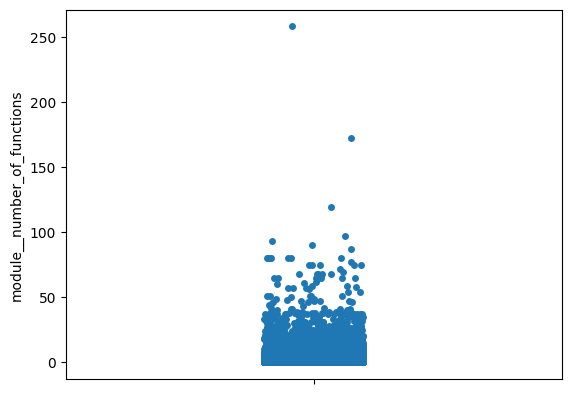

In [86]:
sns.stripplot(X['module__number_of_functions'])

In [87]:
print_outliers_for_df_column(X, 'module__number_of_functions')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9262960283332238
Rango valores atípicos extremos (Tukey): [-9.0,12.0]
Rango valores atípicos leves (Tukey): [-4.5,7.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.17587905592785547,185.95889499714087]
-3.0IQR: 0 instancias tienen un valor para module__number_of_functions inferior a -9.0 (Q1-3*IQR) para module__number_of_functions. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__number_of_functions inferior a -4.5 (Q1-1.5*IQR) para module__number_of_functions. Representando un 0.0% del total de instancias.
+1.5IQR: 1523 instancias tienen un valor para module__number_of_functions superior a 7.5 (Q3+1.5*IQR) para module__number_of_functions. Representando un 8.356% del total de instancias.
+3.0IQR: 739 instancias tienen un valor para module__number_of_functions superior a 12.0 (Q3-3*IQR) para module__number_of_functions. Representando un 4.055% del total de instancias.
L:

In [88]:
X[X['module__number_of_functions'] > 185.9].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_EXPERT
count,1.0,1.000000,1.000000,1.0,1.0,1.00000,1.00000,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,0.0,0.631461,0.002247,62.0,258.0,0.19375,0.80625,0.0,4.841085,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0,0.631461,0.002247,62.0,258.0,0.19375,0.80625,0.0,4.841085,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
25%,0.0,0.631461,0.002247,62.0,258.0,0.19375,0.80625,0.0,4.841085,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
50%,0.0,0.631461,0.002247,62.0,258.0,0.19375,0.80625,0.0,4.841085,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
75%,0.0,0.631461,0.002247,62.0,258.0,0.19375,0.80625,0.0,4.841085,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
max,0.0,0.631461,0.002247,62.0,258.0,0.19375,0.80625,0.0,4.841085,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Hay que analizar el modulo con más de 185 funciones.

### Variable average_stmts_function_body (5/14)
Esta variable representa el número medio de sentencias en el cuerpo de las funciones del fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 53. Con una media de 2.732112.

Habría que analizar porque la media es tan solo de 2.73. Creemos que es debido a que se tiene en cuanta en el calculo los modulos que no tienen funciones.

<Axes: ylabel='module__average_stmts_function_body'>

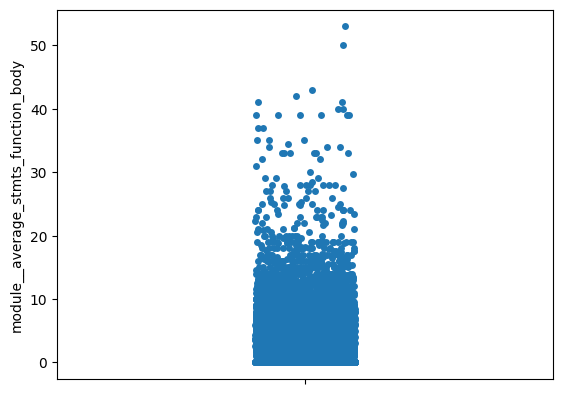

In [89]:
sns.stripplot(X['module__average_stmts_function_body'])

In [90]:
print_outliers_for_df_column(X, 'module__average_stmts_function_body')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5784231706041879
Rango valores atípicos extremos (Tukey): [-13.200000286102295,17.600000381469727]
Rango valores atípicos leves (Tukey): [-6.6000001430511475,11.000000238418579]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.8716115483440257,71.13718905244203]
-3.0IQR: 0 instancias tienen un valor para module__average_stmts_function_body inferior a -13.200000286102295 (Q1-3*IQR) para module__average_stmts_function_body. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__average_stmts_function_body inferior a -6.6000001430511475 (Q1-1.5*IQR) para module__average_stmts_function_body. Representando un 0.0% del total de instancias.
+1.5IQR: 595 instancias tienen un valor para module__average_stmts_function_body superior a 11.000000238418579 (Q3+1.5*IQR) para module__average_stmts_function_body. Representando un 3.265% del total de instancias.
+3.0IQR: 176 instancias tienen un va

In [91]:
X[X['module__average_stmts_function_body'] > 17.6].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_EXPERT
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.0,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,0.215909,0.101837,0.067626,0.329545,2.437500,0.052650,0.947350,0.0,24.608381,0.528263,0.119484,0.392045,0.022727,0.062500,0.261364,0.079545,0.545455,0.028409,0.329545,0.670455
std,0.412625,0.133602,0.134151,1.375056,3.930331,0.163809,0.163809,0.0,7.074607,2.200164,0.275378,0.489600,0.149458,0.242752,0.440631,0.271360,0.499350,0.166613,0.471389,0.471389
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.250000,0.0,17.666666,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.060181,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,22.291667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,0.000000,0.142857,0.071429,0.000000,2.000000,0.000000,1.000000,0.0,28.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,0.600000,0.751323,11.000000,41.000000,0.750000,1.000000,0.0,53.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
X[X['module__average_stmts_function_body'] == 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_EXPERT
count,8602.000000,8602.000000,8602.000000,8602.000000,8602.0,8602.000000,8602.0,8602.000000,8602.0,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.00000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000
mean,0.257731,0.303219,0.115293,1.038363,0.0,0.532338,0.0,0.005676,0.0,2.151120,0.126504,0.061497,0.003836,0.041851,0.37096,0.078586,0.491514,0.013253,0.322716,0.677284
std,0.437410,0.328776,0.202941,2.720165,0.0,0.496957,0.0,0.060228,0.0,3.013769,0.227767,0.240254,0.061823,0.200260,0.48309,0.269108,0.499957,0.114362,0.467542,0.467542
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.166667,0.000000,1.000000,0.0,1.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.500000,0.166667,1.000000,0.0,1.000000,0.0,0.000000,0.0,3.500000,0.166667,0.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,102.000000,0.0,1.000000,0.0,1.000000,0.0,58.086956,0.920000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


8602 ficheros con una media de 0 sentencias por funcion es muy raro. Vamos a realizar esta medición condicionado a tener al menos una función.

In [29]:
X[X['module__number_of_functions'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_EXPERT
count,9624.000000,9624.000000,9624.000000,9624.000000,9624.000000,9624.000000,9624.000000,9624.000000,9624.000000,9624.000000,9624.000000,9624.000000,9624.000000,9624.000000,9624.000000,9624.000000,9624.000000,9624.000000,9624.000000,9624.000000
mean,0.240441,0.159902,0.075945,1.056421,4.778159,0.128771,0.869215,0.002014,5.174093,1.229385,0.157349,0.193890,0.013924,0.074813,0.360349,0.081047,0.457294,0.012573,0.451787,0.548213
std,0.427373,0.183442,0.134971,3.840020,8.036957,0.225773,0.228177,0.024828,4.073895,2.770949,0.264905,0.395364,0.117180,0.263103,0.480127,0.272922,0.498199,0.111427,0.497696,0.497696
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.008772,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.800000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.100000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,4.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.250000,0.090909,1.000000,5.000000,0.200000,1.000000,0.000000,6.000000,1.833333,0.300000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,0.993548,0.937500,113.000000,258.000000,0.991228,1.000000,0.500000,53.000000,114.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Vamos a describir esta variable condicionada a tener al menos una función para ver la media real.

In [30]:
X[X['module__number_of_functions'] > 0]['module__average_stmts_function_body'].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

count    9624.000000
mean        5.174093
std         4.073895
min         1.000000
25%         3.000000
50%         4.166667
75%         6.000000
max        53.000000
Name: module__average_stmts_function_body, dtype: float64

### Variable average_stmts_method_body (6/14)
Esta variable representa el número medio de sentencias en el cuerpo de los métodos del fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 114. Con una media de 1.66441.

Usando sentido común se va a condicionar este estudio a los ficheros con al menos una función.

<Axes: ylabel='module__average_stmts_method_body'>

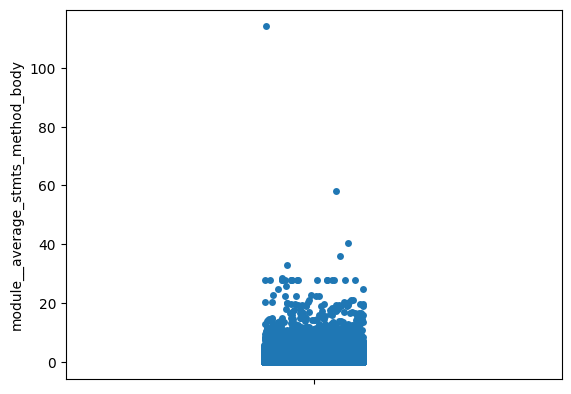

In [31]:
sns.stripplot(X['module__average_stmts_method_body'])

In [3]:
print_outliers_for_df_column(X, 'module__average_stmts_function_body')

NameError: name 'print_outliers_for_df_column' is not defined

In [33]:
X[X['module__average_stmts_method_body'] > 13.3].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_EXPERT
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.0,126.000000,126.000000,126.0,126.000000,126.000000,126.000000,126.000000
mean,0.253968,0.086887,0.029340,1.531746,2.793651,0.740906,0.258301,0.000794,1.968449,20.464258,0.189326,0.238095,0.0,0.039683,0.349206,0.0,0.603175,0.007937,0.452381,0.547619
std,0.437017,0.104020,0.056711,1.348697,5.660131,0.367002,0.366585,0.008909,4.061021,10.529601,0.248593,0.427618,0.0,0.195992,0.478622,0.0,0.491192,0.089087,0.499714,0.499714
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.041667,0.000000,0.000000,0.000000,13.333333,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.333333,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.076923,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,1.000000
75%,0.750000,0.116013,0.034483,2.000000,2.750000,1.000000,0.666667,0.000000,3.812500,22.166667,0.400000,0.000000,0.0,0.000000,1.000000,0.0,1.000000,0.000000,1.000000,1.000000
max,1.000000,0.739130,0.200000,13.000000,37.000000,1.000000,0.958333,0.100000,26.000000,114.000000,0.820895,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


Hay que revisar ese con el máximo de 114

In [34]:
X[X['module__average_stmts_method_body'] == 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_EXPERT
count,10897.00000,10897.000000,10897.000000,10897.000000,10897.000000,10897.000000,10897.000000,10897.000000,10897.000000,10897.0,10897.000000,10897.000000,10897.000000,10897.000000,10897.000000,10897.000000,10897.000000,10897.000000,10897.000000,10897.000000
mean,0.18161,0.304719,0.128999,0.074699,2.578875,0.016790,0.616656,0.001866,3.379203,0.0,0.080567,0.142792,0.014499,0.094154,0.273745,0.129302,0.467376,0.020923,0.474259,0.525741
std,0.38554,0.309368,0.205996,0.952487,5.093549,0.116849,0.483068,0.038802,4.355985,0.0,0.218878,0.349876,0.119543,0.292057,0.445900,0.335549,0.498957,0.143134,0.499360,0.499360
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.200000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.428571,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.00000,0.500000,0.200000,0.000000,3.000000,0.000000,1.000000,0.000000,5.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.00000,1.000000,1.000000,42.000000,80.000000,1.000000,1.000000,1.000000,53.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Vamos a describir la variable condicionada a tener al menos una clase

In [35]:
X[X['module__number_of_classes'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_EXPERT
count,7644.000000,7644.000000,7644.000000,7644.000000,7644.000000,7644.000000,7644.000000,7644.000000,7644.000000,7644.000000,7644.000000,7644.000000,7644.000000,7644.000000,7644.00000,7644.000000,7644.000000,7644.000000,7644.000000,7644.000000
mean,0.351648,0.114926,0.044118,2.498561,2.519623,0.761180,0.232973,0.005847,1.823164,3.966793,0.232503,0.114731,0.001701,0.007718,0.50471,0.006149,0.478807,0.000916,0.273155,0.726845
std,0.477516,0.144807,0.077243,4.823660,7.756079,0.320078,0.318701,0.047239,2.984443,3.355343,0.262053,0.318717,0.041207,0.087521,0.50001,0.078177,0.499583,0.030249,0.445609,0.445609
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.014286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.200000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.076923,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.333333,0.084453,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.166667,0.066667,2.000000,2.000000,1.000000,0.500000,0.000000,3.333333,4.909091,0.485294,0.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,0.994220,0.886792,113.000000,258.000000,1.000000,0.985714,0.750000,34.500000,114.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable name_convention (7/14)
Esta variable es de tipo categórica y representa la name_convention del nombre del fichero.

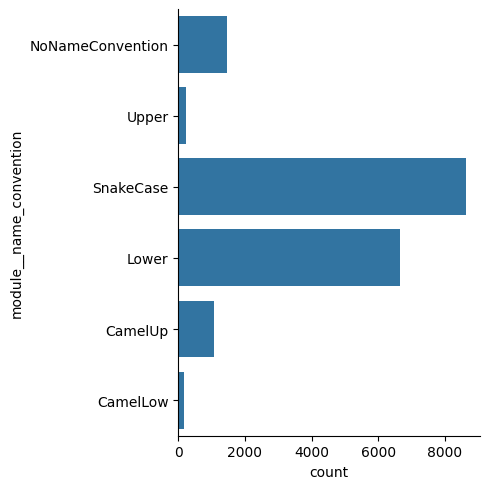

In [36]:
sns.catplot(full_table['module__name_convention'], kind="count")

In [37]:
print_frequency_anal_for_cat_var(full_table, 'module__name_convention')

La variable module__name_convention contiene 6 valores distintos.
El umbral de outlier es de 0.03333333333333333%
La variable module__name_convention toma el valor de SnakeCase en un 47.34% de los items.
La variable module__name_convention toma el valor de Lower en un 36.54% de los items.
La variable module__name_convention toma el valor de NoNameConvention en un 7.989% de los items.
La variable module__name_convention toma el valor de CamelUp en un 5.926% de los items.
La variable module__name_convention toma el valor de Upper en un 1.289% de los items.
La variable module__name_convention toma el valor de CamelLow en un 0.9163% de los items.


### Variable global_stmts_pct (8/14)
Esta variable representa la proporción de los nodos en el global scope que son sentencias. Toma los valores de 0.0 - 1.0. La media es 0.227542.

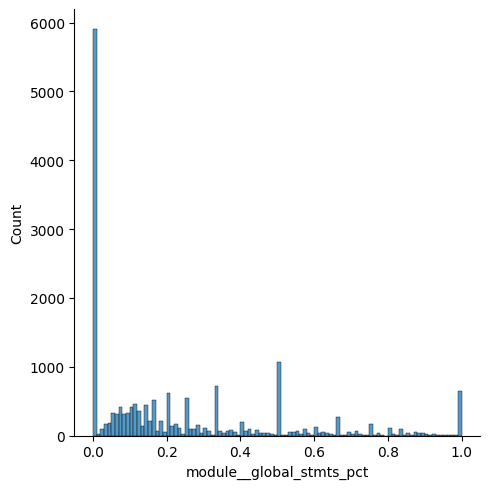

In [38]:
sns.displot(X['module__global_stmts_pct'], bins=[i / 100 for i in range(0, 101)])

Hay muchos ficheros con 0. Hay que comprobar a que se puede deber. Seguramente por ser únicamente la definición de una clase.

In [39]:
print_outliers_for_df_column(X, 'module__global_stmts_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5006119757890701
Rango valores atípicos extremos (Tukey): [-1.0000000298023224,1.3333333730697632]
Rango valores atípicos leves (Tukey): [-0.5000000149011612,0.833333358168602]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.08670106894617238,4.036916428249711]
-3.0IQR: 0 instancias tienen un valor para module__global_stmts_pct inferior a -1.0000000298023224 (Q1-3*IQR) para module__global_stmts_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__global_stmts_pct inferior a -0.5000000149011612 (Q1-1.5*IQR) para module__global_stmts_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 943 instancias tienen un valor para module__global_stmts_pct superior a 0.833333358168602 (Q3+1.5*IQR) para module__global_stmts_pct. Representando un 5.174% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para module__global_stmts_pct superior a 1.3333333730697632 (Q3-3

In [40]:
X[X['module__global_stmts_pct'] == 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_EXPERT
count,5900.000000,5900.0,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000,5900.0,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000
mean,0.273051,0.0,0.104428,0.907458,1.741186,0.438521,0.481280,0.003589,2.791842,1.843276,0.159398,0.0,0.014746,0.052373,0.396271,0.041017,0.486441,0.009153,0.327458,0.672542
std,0.445565,0.0,0.219916,2.541784,4.182110,0.475219,0.479505,0.050693,4.174570,2.765079,0.266258,0.0,0.120544,0.222797,0.489163,0.198346,0.499858,0.095238,0.469326,0.469326
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.454545,0.000000,1.333333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.0,0.111111,1.000000,2.000000,1.000000,1.000000,0.000000,4.428571,3.000000,0.323816,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,0.0,1.000000,113.000000,172.000000,1.000000,1.000000,1.000000,43.000000,40.500000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Comprobar un fichero que tenga 0 de todo

### Variable global_expressions (9/14)
Esta variable representa la proporción de los nodos en el global scope son expresiones. Este campo toma valores del 0.0 - 1.0. Su media es 0.094516. La media es MUY baja, habría que revisarlo.

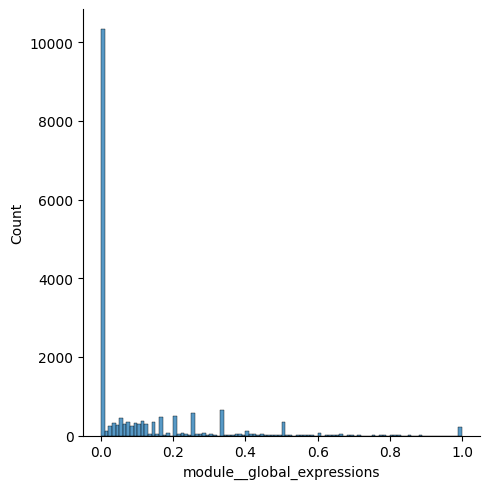

In [41]:
sns.displot(X['module__global_expressions'], bins=[i / 100 for i in range(0, 101)])

La mayoría es 0, relativamente lógico debido al uso de encapsulación.

In [42]:
print_outliers_for_df_column(X, 'module__global_expressions')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.6924707653238275
Rango valores atípicos extremos (Tukey): [-0.375,0.5]
Rango valores atípicos leves (Tukey): [-0.1875,0.3125]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.016612097031117618,3.1168939881714683]
-3.0IQR: 0 instancias tienen un valor para module__global_expressions inferior a -0.375 (Q1-3*IQR) para module__global_expressions. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__global_expressions inferior a -0.1875 (Q1-1.5*IQR) para module__global_expressions. Representando un 0.0% del total de instancias.
+1.5IQR: 1950 instancias tienen un valor para module__global_expressions superior a 0.3125 (Q3+1.5*IQR) para module__global_expressions. Representando un 10.7% del total de instancias.
+3.0IQR: 503 instancias tienen un valor para module__global_expressions superior a 0.5 (Q3-3*IQR) para module__global_expressions. Representando un 2.76% del total de instancia

In [43]:
X[X['module__global_expressions'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_EXPERT
count,7922.000000,7922.000000,7922.000000,7922.000000,7922.000000,7922.000000,7922.000000,7922.000000,7922.000000,7922.000000,7922.000000,7922.000000,7922.000000,7922.000000,7922.000000,7922.000000,7922.000000,7922.000000,7922.000000,7922.000000
mean,0.571952,0.247984,0.217452,1.202853,2.590760,0.287518,0.449804,0.003653,2.628295,1.570813,0.121514,0.107170,0.005554,0.072709,0.407978,0.116511,0.381722,0.015526,0.447109,0.552891
std,0.494827,0.250464,0.202495,4.486890,7.416575,0.411391,0.461087,0.043695,3.655517,2.525418,0.235014,0.309349,0.074324,0.259674,0.491490,0.320857,0.485840,0.123642,0.497226,0.497226
min,0.000000,0.000000,0.002247,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.166667,0.142857,0.000000,1.000000,0.000000,0.333333,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.400000,0.306856,1.000000,2.000000,0.600000,1.000000,0.000000,4.333333,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,0.987805,1.000000,113.000000,258.000000,1.000000,1.000000,1.000000,42.000000,24.799999,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
X[X['module__global_expressions'] == 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_EXPERT
count,10304.0,10304.000000,10304.0,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000
mean,0.0,0.211826,0.0,0.928766,2.470982,0.343628,0.466031,0.003812,2.811928,1.736370,0.159150,0.150039,0.011937,0.048913,0.332589,0.051727,0.543963,0.010870,0.347632,0.652368
std,0.0,0.286226,0.0,2.106956,5.300934,0.440563,0.467065,0.046281,4.124990,3.195805,0.257278,0.357127,0.108608,0.215697,0.471164,0.221487,0.498088,0.103694,0.476242,0.476242
min,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.100000,0.0,0.000000,1.000000,0.000000,0.333333,0.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,0.0,0.300000,0.0,1.000000,3.000000,1.000000,1.000000,0.000000,4.444445,3.000000,0.333333,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,0.0,1.000000,0.0,50.000000,90.000000,1.000000,1.000000,1.000000,53.000000,114.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable class_defs_pct (10/14)
Esta variable representa la proporción de definiciones que son definiciones de clases. Esta variable toma valores de 0.0 - 1.0. Su media es 0.31924. 

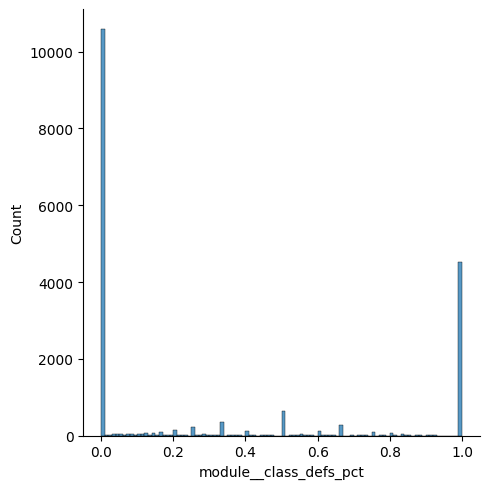

In [45]:
sns.displot(X['module__class_defs_pct'], bins=[i / 100 for i in range(0, 101)])

In [46]:
print_outliers_for_df_column(X, 'module__class_defs_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.2517417073249817
Rango valores atípicos extremos (Tukey): [-2.6666666865348816,3.555555582046509]
Rango valores atípicos leves (Tukey): [-1.3333333432674408,2.222222238779068]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.5524380957632271,4.538603263557113]
-3.0IQR: 0 instancias tienen un valor para module__class_defs_pct inferior a -2.6666666865348816 (Q1-3*IQR) para module__class_defs_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__class_defs_pct inferior a -1.3333333432674408 (Q1-1.5*IQR) para module__class_defs_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para module__class_defs_pct superior a 2.222222238779068 (Q3+1.5*IQR) para module__class_defs_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para module__class_defs_pct superior a 3.555555582046509 (Q3-3*IQR) para module__cl

In [47]:
X[X['module__class_defs_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_EXPERT
count,7644.000000,7644.000000,7644.000000,7644.000000,7644.000000,7644.000000,7644.000000,7644.000000,7644.000000,7644.000000,7644.000000,7644.000000,7644.000000,7644.000000,7644.00000,7644.000000,7644.000000,7644.000000,7644.000000,7644.000000
mean,0.351648,0.114926,0.044118,2.498561,2.519623,0.761180,0.232973,0.005847,1.823164,3.966793,0.232503,0.114731,0.001701,0.007718,0.50471,0.006149,0.478807,0.000916,0.273155,0.726845
std,0.477516,0.144807,0.077243,4.823660,7.756079,0.320078,0.318701,0.047239,2.984443,3.355343,0.262053,0.318717,0.041207,0.087521,0.50001,0.078177,0.499583,0.030249,0.445609,0.445609
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.014286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.200000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.076923,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.333333,0.084453,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.166667,0.066667,2.000000,2.000000,1.000000,0.500000,0.000000,3.333333,4.909091,0.485294,0.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,0.994220,0.886792,113.000000,258.000000,1.000000,0.985714,0.750000,34.500000,114.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable function_defs_pct (11/14)
Esta variable representa la proporción de deficiones que son definiciones de funciones. Esta variable toma valores de 0.0 - 1.0. Su media es 0.458978

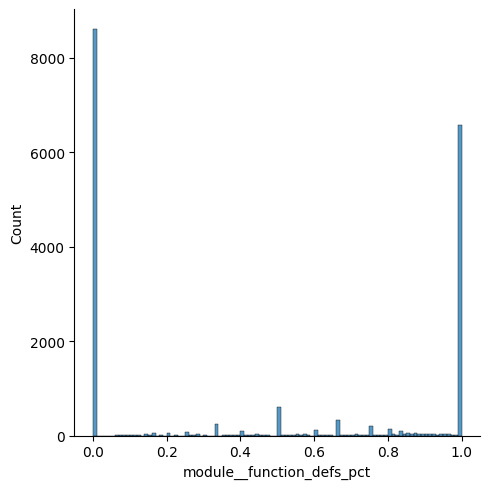

In [48]:
sns.displot(X['module__function_defs_pct'], bins=[i / 100 for i in range(0, 101)])

In [49]:
print_outliers_for_df_column(X, 'module__function_defs_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.3456117109562014
Rango valores atípicos extremos (Tukey): [-3.0,4.0]
Rango valores atípicos leves (Tukey): [-1.5,2.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.44745653242156924,6.976959249495945]
-3.0IQR: 0 instancias tienen un valor para module__function_defs_pct inferior a -3.0 (Q1-3*IQR) para module__function_defs_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__function_defs_pct inferior a -1.5 (Q1-1.5*IQR) para module__function_defs_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para module__function_defs_pct superior a 2.5 (Q3+1.5*IQR) para module__function_defs_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para module__function_defs_pct superior a 4.0 (Q3-3*IQR) para module__function_defs_pct. Representando un 0.0% del total de instancias.
L: 0 instancias tienen un valo

In [50]:
X[X['module__function_defs_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_EXPERT
count,9624.000000,9624.000000,9624.000000,9624.000000,9624.000000,9624.000000,9624.000000,9624.000000,9624.000000,9624.000000,9624.000000,9624.000000,9624.000000,9624.000000,9624.000000,9624.000000,9624.000000,9624.000000,9624.000000,9624.000000
mean,0.240441,0.159902,0.075945,1.056421,4.778159,0.128771,0.869215,0.002014,5.174093,1.229385,0.157349,0.193890,0.013924,0.074813,0.360349,0.081047,0.457294,0.012573,0.451787,0.548213
std,0.427373,0.183442,0.134971,3.840020,8.036957,0.225773,0.228177,0.024828,4.073895,2.770949,0.264905,0.395364,0.117180,0.263103,0.480127,0.272922,0.498199,0.111427,0.497696,0.497696
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.008772,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.800000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.100000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,4.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.250000,0.090909,1.000000,5.000000,0.200000,1.000000,0.000000,6.000000,1.833333,0.300000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,0.993548,0.937500,113.000000,258.000000,0.991228,1.000000,0.500000,53.000000,114.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
X[X['module__function_defs_pct'] < 1.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_EXPERT
count,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000
mean,0.291095,0.261234,0.093789,1.638555,1.661633,0.499182,0.154026,0.005852,1.203846,2.602569,0.153222,0.088538,0.003346,0.031829,0.403312,0.059369,0.492107,0.010038,0.331417,0.668583
std,0.454287,0.300369,0.180369,4.082591,6.397658,0.444949,0.281834,0.056380,2.573610,3.306294,0.239691,0.284088,0.057750,0.175552,0.490583,0.236323,0.499959,0.099689,0.470743,0.470743
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.142857,0.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.463940,0.111111,2.000000,1.000000,1.000000,0.200000,0.000000,1.000000,4.000000,0.333333,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,113.000000,258.000000,1.000000,0.985714,1.000000,34.500000,114.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable enum_defs_pct (12/14)
Esta variable representa la proporción de las definiciones que son clases con la notación enum. Esta variable toma valores de 0.0 - 1.0. Su media es 0.003743.

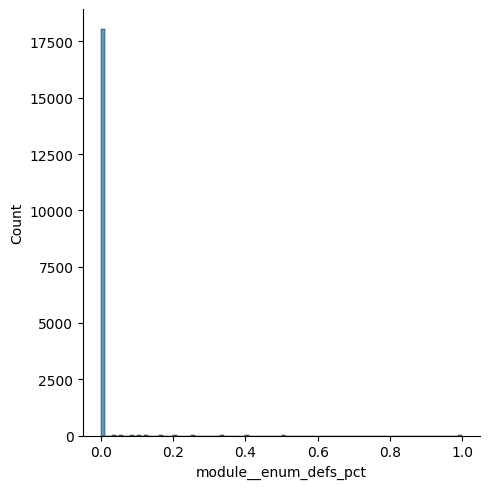

In [52]:
sns.displot(X['module__enum_defs_pct'], bins=[i / 100 for i in range(0, 101)])

In [53]:
print_outliers_for_df_column(X, 'module__enum_defs_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9567046669273629
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para module__enum_defs_pct inferior a 0.0 (Q1-3*IQR) para module__enum_defs_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__enum_defs_pct inferior a 0.0 (Q1-1.5*IQR) para module__enum_defs_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 189 instancias tienen un valor para module__enum_defs_pct superior a 0.0 (Q3+1.5*IQR) para module__enum_defs_pct. Representando un 1.037% del total de instancias.
+3.0IQR: 189 instancias tienen un valor para module__enum_defs_pct superior a 0.0 (Q3-3*IQR) para module__enum_defs_pct. Representando un 1.037% del total de instancias.
L: 0 instancias tienen un valor para module__enum_defs_pct inferior a 0.0 para module__en

In [54]:
X[X['module__enum_defs_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_EXPERT
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.0,189.0,189.000000,189.0,189.000000,189.0,189.0,189.0
mean,0.343915,0.144781,0.035442,2.608466,3.285714,0.396824,0.242264,0.360912,1.997986,2.949368,0.367436,0.042328,0.0,0.0,0.661376,0.0,0.338624,0.0,0.0,1.0
std,0.476275,0.130338,0.081328,3.336633,8.320243,0.282182,0.308794,0.261220,2.852680,2.188952,0.248884,0.201871,0.0,0.0,0.474499,0.0,0.474499,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015625,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.0
25%,0.000000,0.045455,0.000000,1.000000,0.000000,0.116279,0.000000,0.166667,0.000000,1.642857,0.125000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.0
50%,0.000000,0.125000,0.000000,2.000000,0.000000,0.500000,0.000000,0.333333,0.000000,3.000000,0.425926,0.000000,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,1.0
75%,1.000000,0.217391,0.045455,3.000000,3.000000,0.666667,0.500000,0.500000,3.500000,4.289474,0.574468,0.000000,0.0,0.0,1.000000,0.0,1.000000,0.0,0.0,1.0
max,1.000000,0.883721,0.724638,26.000000,59.000000,0.875000,0.950820,1.000000,16.000000,14.883721,0.870968,1.000000,0.0,0.0,1.000000,0.0,1.000000,0.0,0.0,1.0


Solo se han usado enum en 189 de las cerca de 19mil ficheros. En los ficheros donde se usan enum, su media es de 0.36.

### Variable type_annotations_pct (13/14)
Esta variable representa la proporción de los parámetros y returns de funciones y métodos que tienen una anotación de tipo. Toma valores entre 0.0 - 1.0. Su media es 0.142791. Esto nos dice que los tipos son poco usados en Python, como era de esperar.

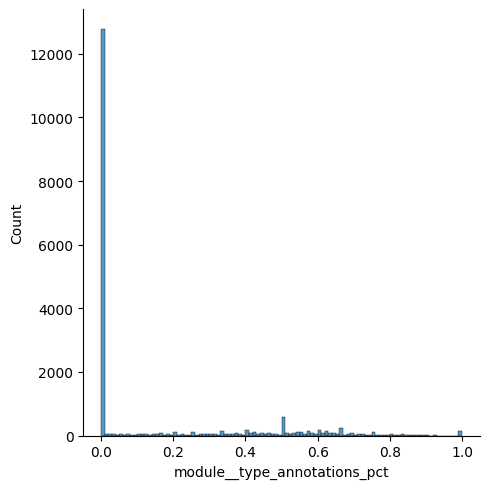

In [55]:
sns.displot(X['module__type_annotations_pct'], bins=[i / 100 for i in range(0, 101)])

In [56]:
print_outliers_for_df_column(X, 'module__type_annotations_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.34511692377464465
Rango valores atípicos extremos (Tukey): [-0.722222238779068,0.9629629850387573]
Rango valores atípicos leves (Tukey): [-0.361111119389534,0.6018518656492233]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.1079077275823649,1.6767934001794707]
-3.0IQR: 0 instancias tienen un valor para module__type_annotations_pct inferior a -0.722222238779068 (Q1-3*IQR) para module__type_annotations_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__type_annotations_pct inferior a -0.361111119389534 (Q1-1.5*IQR) para module__type_annotations_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 1524 instancias tienen un valor para module__type_annotations_pct superior a 0.6018518656492233 (Q3+1.5*IQR) para module__type_annotations_pct. Representando un 8.362% del total de instancias.
+3.0IQR: 133 instancias tienen un valor para module__type_annotations_pct super

In [57]:
X[X['module__type_annotations_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_EXPERT
count,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.0,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000
mean,0.316520,0.105887,0.034303,1.611477,3.151133,0.552253,0.439204,0.008543,2.881550,2.935158,0.475606,0.092288,0.000548,0.0,0.465278,0.003472,0.529605,0.001096,0.161732,0.838268
std,0.465161,0.125478,0.063596,2.798869,6.568871,0.429327,0.430930,0.060318,3.643631,3.132092,0.217854,0.289459,0.023410,0.0,0.498838,0.058829,0.499168,0.033098,0.368239,0.368239
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002128,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.076923,0.000000,1.000000,1.000000,0.562500,0.400000,0.000000,2.000000,2.666667,0.500000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.157895,0.055556,2.000000,4.000000,1.000000,1.000000,0.000000,4.637987,4.260042,0.625000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,0.879310,0.937500,96.000000,119.000000,1.000000,1.000000,1.000000,40.000000,58.086956,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
